Bayesian Modeling Example
------

<center><img src="images/dilbert_funny.jpg" height="500"/></center>

We want to compare the click-through rate (CTR) for "A" and "B"

-----
Let's look at the formula and derviation:
http://www.evanmiller.org/bayesian-ab-testing.html

Let's code it up
------

HT: http://engineering.richrelevance.com/bayesian-ab-tests/

In [93]:
reset -fs

In [94]:
import matplotlib.pyplot as plt
from numpy.random import beta as beta_dist
import numpy as np
import pandas as pd

%matplotlib inline

If we let p ~ Beta(α=1, β=1) be the prior:

In [95]:
α = 1 
β = 1

In [96]:
# # From class

# clicks_A = 563 
# views_A = 835 
# clicks_B = 463 
# views_B = 829

In [84]:
# # Very Different

# clicks_A = 10_000 
# views_A = 56_000 
# clicks_B = 345 
# views_B = 49_000

In [113]:
# Different

clicks_A = 450 
views_A = 56_000 
clicks_B = 345 
views_B = 49_000

In [107]:
# # Same, same

# clicks_A = 450 
# views_A = 56_000 
# clicks_B = 450 
# views_B = 56_000

In [119]:
n_samples = 51 #10_000 # number of samples to draw

In [120]:
A_samples = beta_dist(a=clicks_A+α, 
                      b=views_A-clicks_A+β, 
                      size=n_samples)
B_samples = beta_dist(a=clicks_B+α, 
                      b=views_B-clicks_B+β, 
                      size=n_samples)

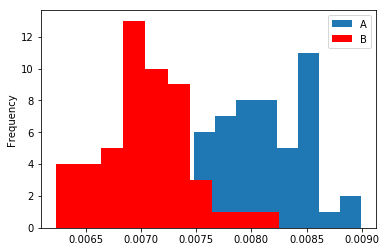

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
pd.DataFrame({'A': A_samples}).plot(kind='hist', ax=ax, legend=True);
pd.DataFrame({'B': B_samples}).plot(kind='hist', ax=ax, legend=True, color='red',);

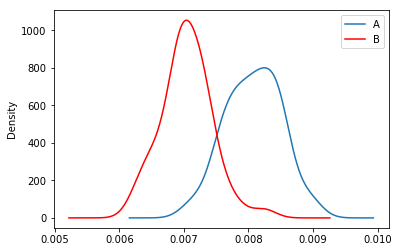

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)
pd.DataFrame({'A': A_samples}).plot(kind='kde', ax=ax, legend=True);
pd.DataFrame({'B': B_samples}).plot(kind='kde', ax=ax, legend=True, color='red',);

In [118]:
A_v_B = np.mean(A_samples > B_samples)
f'{A_v_B:.2}'

'0.98'

In [92]:
print(f'The probability that A is better B: {A_v_B:.2}')

print('\n\nBaseline (pure) chance that A is better B is .5')

The probability that A is better B: 1.0


Baseline (pure) chance that A is better B is .5


Let's look at it another way:
http://www.evanmiller.org/ab-testing/chi-squared.html#!450/56000;345/49000@93

<br>
<br> 
<br>

----